In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import openpyxl
import re

In [13]:
# pip install openpyxl

     -------------------------------------- 242.2/242.2 KB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans Mono',
 'cmss10',
 'cmtt10',
 'STIXSizeFiveSym',
 'cmr10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'Georgia',
 'HoloLens MDL2 Assets',
 'Georgia',
 'Franklin Gothic Medium',
 'Consolas',
 'Comic Sans MS',
 'Ink Free',
 'Segoe UI',
 'Ebrima',
 'Candara',
 'Segoe Script',
 'Microsoft YaHei',
 'Sitka Small',
 'Courier New',
 'Georgia',
 'Times New Roman',
 'Cascadia Code',
 'Cascadia Mono',
 'Nirmala UI',
 'MingLiU-ExtB',
 'Nirmala UI',
 '

- KOSPI 5개년 ROE 지수 확인

In [119]:
df = pd.read_excel("../data/KOSPIROE5years.xlsx")
df.head()

,종목명,2017,2018,2019,2020,2021
0,에스디바이오센서,-4.6,3.8,NaN,139.7,86.6
1,태영건설,10.1,19.2,8.4,62.0,12.6
2,크래프톤,NaN,NaN,99.2,61.9,23.9
3,삼성출판사,3.9,0.4,5.5,45.6,1.4
4,솔루엠,-39.7,-50.5,87.0,43.3,13.7


In [120]:
df.isna().sum()

종목명     0
2017    8
2018    3
2019    2
2020    0
2021    1
dtype: int64

In [121]:
df.replace('', np.nan)
df

,종목명,2017,2018,2019,2020,2021
0,에스디바이오센서,-4.6,3.8,NaN,139.7,86.6
1,태영건설,10.1,19.2,8.4,62.0,12.6
2,크래프톤,NaN,NaN,99.2,61.9,23.9
3,삼성출판사,3.9,0.4,5.5,45.6,1.4
4,솔루엠,-39.7,-50.5,87.0,43.3,13.7
...,...,...,...,...,...,...
83,한국금융지주,14.1,13.0,18.1,16.3,30.7
84,메리츠금융지주,19.4,13.9,15.3,16.1,22.5
85,신영증권,6.7,6.5,1.8,15.3,5.6
86,케이탑리츠,4.0,5.0,8.0,15.0,5.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     88 non-null     object 
 1   2017    80 non-null     float64
 2   2018    85 non-null     float64
 3   2019    86 non-null     float64
 4   2020    88 non-null     float64
 5   2021    87 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.2+ KB


In [123]:
df.isna().sum()

종목명     0
2017    8
2018    3
2019    2
2020    0
2021    1
dtype: int64

In [124]:
df.dropna(inplace=True)
df

,종목명,2017,2018,2019,2020,2021
1,태영건설,10.1,19.2,8.4,62.0,12.6
3,삼성출판사,3.9,0.4,5.5,45.6,1.4
4,솔루엠,-39.7,-50.5,87.0,43.3,13.7
5,시디즈,1.4,17.1,27.3,42.9,29.7
6,신풍제지,2.2,18.0,32.3,38.8,-2.0
...,...,...,...,...,...,...
83,한국금융지주,14.1,13.0,18.1,16.3,30.7
84,메리츠금융지주,19.4,13.9,15.3,16.1,22.5
85,신영증권,6.7,6.5,1.8,15.3,5.6
86,케이탑리츠,4.0,5.0,8.0,15.0,5.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 87
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     78 non-null     object 
 1   2017    78 non-null     float64
 2   2018    78 non-null     float64
 3   2019    78 non-null     float64
 4   2020    78 non-null     float64
 5   2021    78 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.3+ KB


In [ ]:
col = [2017, 2018, 2019, 2020, 2021]

In [126]:
# ROE 11이상 
df_ROE_11_upper = df[(df[2017] >= 11) & (df[2018] >= 11) & (df[2019] >= 11) & (df[2020] >= 11) & (df[2021] >= 11)]
df_ROE_11_upper

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
20,효성ITX,16.5,13.7,21.8,25.2,22.6
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0
28,DB하이텍,27.6,17.1,17.4,23.1,30.0
31,삼양식품,15.3,16.2,23.2,21.5,14.3
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8
34,미원상사,14.9,11.4,14.7,21.1,22.1
37,엔씨소프트,19.1,16.4,14.7,20.8,11.7


In [127]:
# '평균' 열 추가
df_ROE_11_upper["average"] = df_ROE_11_upper.mean(axis=1)
df_ROE_11_upper

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
20,효성ITX,16.5,13.7,21.8,25.2,22.6,19.96
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52
28,DB하이텍,27.6,17.1,17.4,23.1,30.0,23.04
31,삼양식품,15.3,16.2,23.2,21.5,14.3,18.10
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8,24.64
34,미원상사,14.9,11.4,14.7,21.1,22.1,16.84
37,엔씨소프트,19.1,16.4,14.7,20.8,11.7,16.54


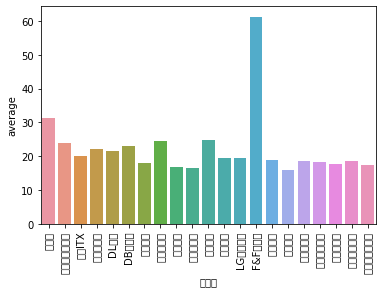

In [128]:
sns.barplot(
    data = df_ROE_11_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()

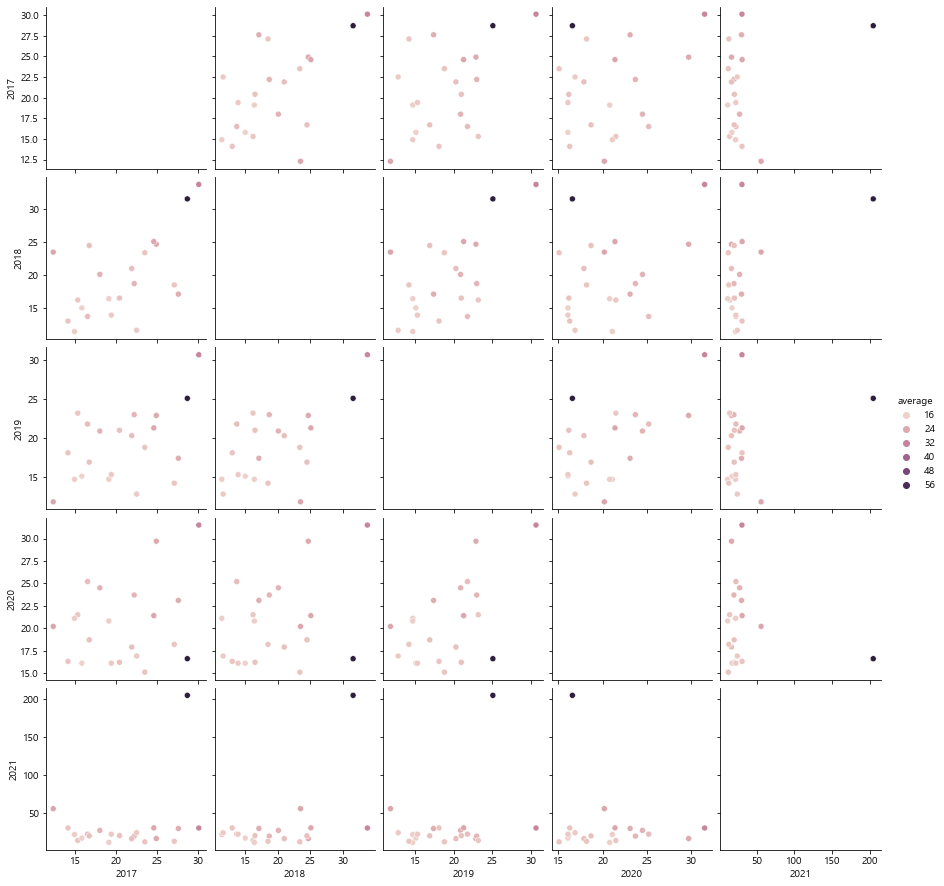

In [129]:
sns.pairplot(df_ROE_11_upper, hue="average")

In [135]:
df_code = pd.read_excel("../data/KOSPI데이터0305.xlsx")
df_code

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,삼성전자,5930,4351971,2796048,651054.5,12.62,13.92,9.92,1.67,1.556472,6.684496,4266212,1217212,3049000,5777
1,SK하이닉스,660,939123,319004,123145.7,11.66,9.53,6.98,1.51,2.943922,7.626113,711739,192648,519091,11061
2,NAVER,35420,533980,53041,14472.1,3.22,15.22,5.77,2.05,10.067306,36.897202,170142,87591,82551,101024
3,카카오,35720,430799,41568,9711.0,38.03,2.70,1.68,4.76,10.363717,44.361961,119540,45262,74278,2540
4,LG화학,51910,393905,300765,58408.3,14.54,2.93,1.81,2.04,1.309677,6.743990,413889,225985,187904,38376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,체시스,33250,336,429,73.2,-17.50,-8.25,-2.84,1.10,0.783217,4.590164,812,479,333,-60
783,코아스,71950,334,982,20.2,-20.77,-6.81,-2.32,1.48,0.340122,16.534653,732,492,240,-52
784,다이나믹디자인,145210,323,768,-108.3,-0.76,-90.21,-24.63,0.54,0.420573,-2.982456,1512,870,642,-270
785,부산주공,5030,321,1527,-67.5,-3.72,-47.39,-5.05,1.26,0.210216,-4.755556,2498,2231,267,-131


In [136]:
df_code = df_code[["종목명", "종목코드"]]
df_code

,종목명,종목코드
0,삼성전자,5930
1,SK하이닉스,660
2,NAVER,35420
3,카카오,35720
4,LG화학,51910
...,...,...
782,체시스,33250
783,코아스,71950
784,다이나믹디자인,145210
785,부산주공,5030


In [137]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     787 non-null    object
 1   종목코드    787 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


In [138]:
df_code = df_code.astype({"종목코드":"string"})
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     787 non-null    object
 1   종목코드    787 non-null    string
dtypes: object(1), string(1)
memory usage: 12.4+ KB


In [139]:
for i in range(7):
    df_code["종목코드"] = df_code["종목코드"].str.zfill(i)
df_code.head()

,종목명,종목코드
0,삼성전자,005930
1,SK하이닉스,000660
2,NAVER,035420
3,카카오,035720
4,LG화학,051910


In [140]:
df_code_merge = pd.merge(df_code, df_ROE_11_upper, how='outer', on='종목명')
df_code_merge

,종목명,종목코드,2017,2018,2019,2020,2021,average
0,삼성전자,005930,NaN,NaN,NaN,NaN,NaN,NaN
1,SK하이닉스,000660,NaN,NaN,NaN,NaN,NaN,NaN
2,NAVER,035420,NaN,NaN,NaN,NaN,NaN,NaN
3,카카오,035720,NaN,NaN,NaN,NaN,NaN,NaN
4,LG화학,051910,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
782,체시스,033250,NaN,NaN,NaN,NaN,NaN,NaN
783,코아스,071950,NaN,NaN,NaN,NaN,NaN,NaN
784,다이나믹디자인,145210,NaN,NaN,NaN,NaN,NaN,NaN
785,부산주공,005030,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df_code_merge.dropna(inplace=True)
df_code_merge

,종목명,종목코드,2017,2018,2019,2020,2021,average
21,LG생활건강,051900,21.9,21.0,20.3,17.9,16.7,19.56
36,엔씨소프트,036570,19.1,16.4,14.7,20.8,11.7,16.54
62,코웨이,021240,30.1,33.8,30.7,31.5,30.6,31.34
64,금호석유,011780,12.3,23.5,11.8,20.2,55.9,24.74
66,메리츠금융지주,138040,19.4,13.9,15.3,16.1,22.5,17.44
67,메리츠화재,000060,22.5,11.6,12.8,16.9,24.4,17.64
68,한국금융지주,071050,14.1,13.0,18.1,16.3,30.7,18.44
92,DB하이텍,000990,27.6,17.1,17.4,23.1,30.0,23.04
112,제일기획,030000,15.8,15.0,15.1,16.1,17.4,15.88
114,한솔케미칼,014680,18.0,20.1,20.9,24.5,27.5,22.20


In [146]:
pip install next-redux-wrapper

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement next-redux-wrapper (from versions: none)
ERROR: No matching distribution found for next-redux-wrapper


In [142]:
df_ROE_11_upper = df_code_merge.copy()

In [143]:
df_ROE_11_upper.to_excel("kospi_ROE_11_upper.xlsx")

In [144]:
df_ROE_11_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 21 to 523
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      21 non-null     object 
 1   종목코드     21 non-null     string 
 2   2017     21 non-null     float64
 3   2018     21 non-null     float64
 4   2019     21 non-null     float64
 5   2020     21 non-null     float64
 6   2021     21 non-null     float64
 7   average  21 non-null     float64
dtypes: float64(6), object(1), string(1)
memory usage: 1.5+ KB


In [89]:
# ROE 12이상
df_ROE_12_upper = df[(df[2017] >= 12) & (df[2018] >= 12) & (df[2019] >= 12) & (df[2020] >= 12) & (df[2021] >= 12)]
df_ROE_12_upper

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
20,효성ITX,16.5,13.7,21.8,25.2,22.6
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0
28,DB하이텍,27.6,17.1,17.4,23.1,30.0
31,삼양식품,15.3,16.2,23.2,21.5,14.3
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8
52,계룡건설,16.7,24.5,16.9,18.7,20.3
62,LG생활건강,21.9,21.0,20.3,17.9,16.7


In [90]:
# '평균' 열 추가
df_ROE_12_upper["average"] = df_ROE_12_upper.mean(axis=1)
df_ROE_12_upper

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
20,효성ITX,16.5,13.7,21.8,25.2,22.6,19.96
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52
28,DB하이텍,27.6,17.1,17.4,23.1,30.0,23.04
31,삼양식품,15.3,16.2,23.2,21.5,14.3,18.10
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8,24.64
52,계룡건설,16.7,24.5,16.9,18.7,20.3,19.42
62,LG생활건강,21.9,21.0,20.3,17.9,16.7,19.56


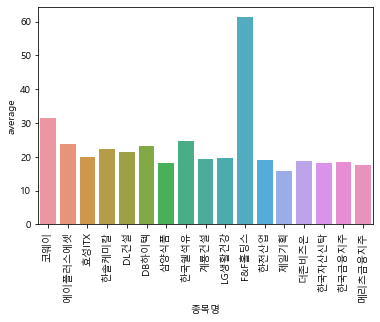

In [91]:
sns.barplot(
    data = df_ROE_12_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()

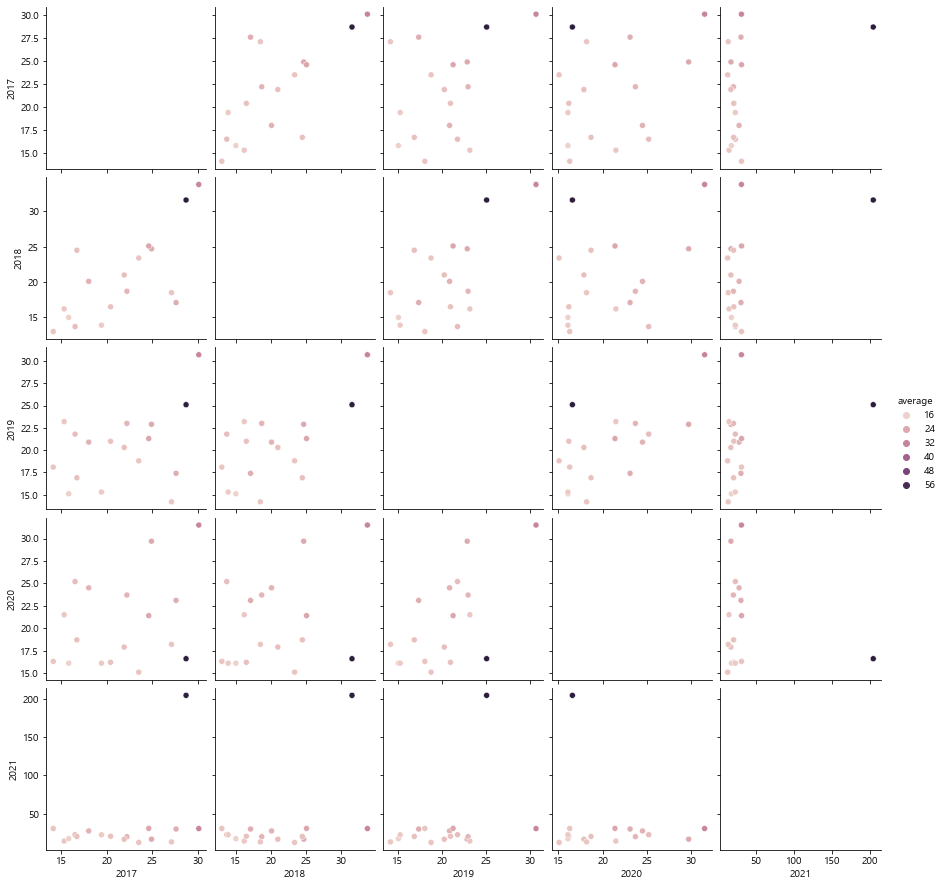

In [92]:
sns.pairplot(df_ROE_12_upper, hue="average")

In [21]:
df_ROE_12_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 11 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      17 non-null     object 
 1   2017     17 non-null     float64
 2   2018     17 non-null     float64
 3   2019     17 non-null     float64
 4   2020     17 non-null     float64
 5   2021     17 non-null     float64
 6   average  17 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.6+ KB


In [22]:
# ROE 13이상
df_ROE_13_upper = df[(df[2017] >= 13) & (df[2018] >= 13) & (df[2019] >= 13) & (df[2020] >= 13) & (df[2021] >= 13)]
df_ROE_13_upper

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
20,효성ITX,16.5,13.7,21.8,25.2,22.6
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0
28,DB하이텍,27.6,17.1,17.4,23.1,30.0
31,삼양식품,15.3,16.2,23.2,21.5,14.3
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8
52,계룡건설,16.7,24.5,16.9,18.7,20.3
62,LG생활건강,21.9,21.0,20.3,17.9,16.7


In [23]:
# '평균' 열 추가
df_ROE_13_upper["average"] = df_ROE_13_upper.mean(axis=1)
df_ROE_13_upper

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
20,효성ITX,16.5,13.7,21.8,25.2,22.6,19.96
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52
28,DB하이텍,27.6,17.1,17.4,23.1,30.0,23.04
31,삼양식품,15.3,16.2,23.2,21.5,14.3,18.10
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8,24.64
52,계룡건설,16.7,24.5,16.9,18.7,20.3,19.42
62,LG생활건강,21.9,21.0,20.3,17.9,16.7,19.56


In [24]:
df_ROE_13_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 11 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      16 non-null     object 
 1   2017     16 non-null     float64
 2   2018     16 non-null     float64
 3   2019     16 non-null     float64
 4   2020     16 non-null     float64
 5   2021     16 non-null     float64
 6   average  16 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.0+ KB


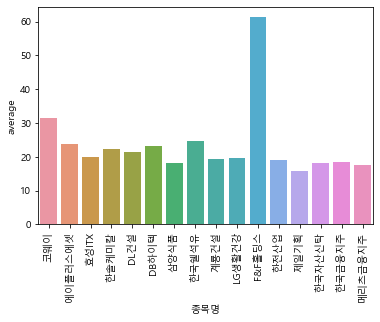

In [25]:
sns.barplot(
    data = df_ROE_13_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()

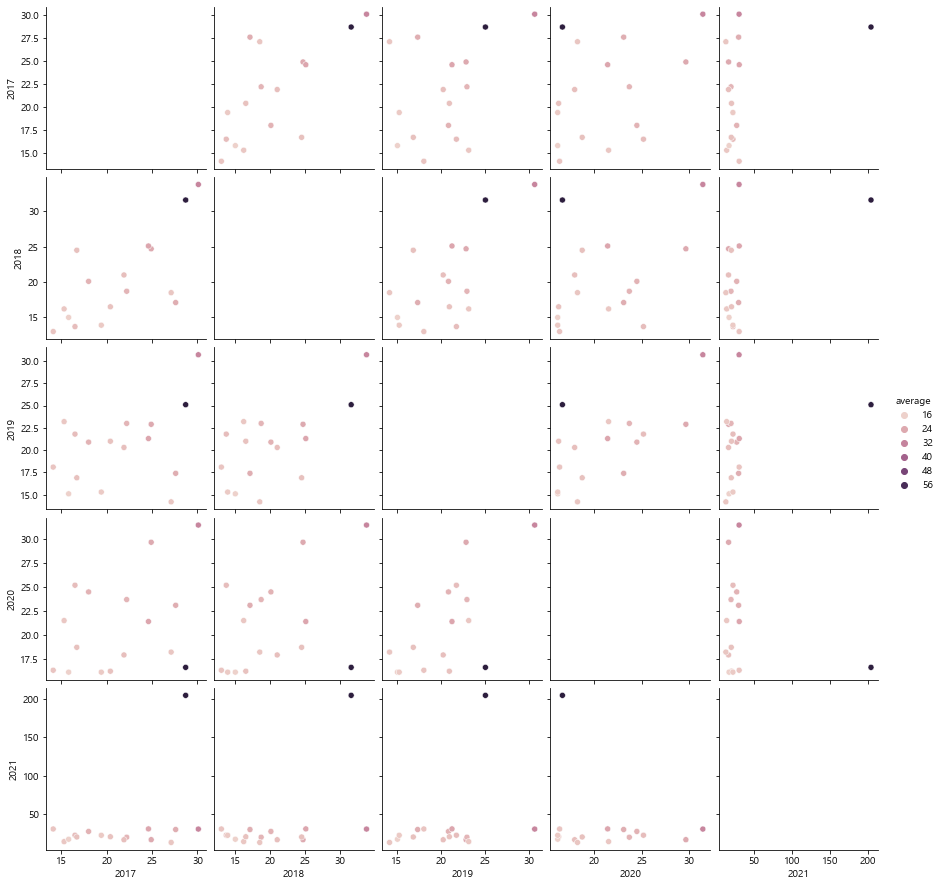

In [26]:
sns.pairplot(df_ROE_13_upper, hue="average")

In [27]:
# ROE 14이상
df_ROE_14_upper = df[(df[2017] >= 14) & (df[2018] >= 14) & (df[2019] >= 14) & (df[2020] >= 14) & (df[2021] >= 14)]
df_ROE_14_upper

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0
28,DB하이텍,27.6,17.1,17.4,23.1,30.0
31,삼양식품,15.3,16.2,23.2,21.5,14.3
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8
52,계룡건설,16.7,24.5,16.9,18.7,20.3
62,LG생활건강,21.9,21.0,20.3,17.9,16.7
63,F&F홀딩스,28.7,31.6,25.1,16.6,204.3


In [28]:
# '평균' 열 추가
df_ROE_14_upper["average"] = df_ROE_14_upper.mean(axis=1)
df_ROE_14_upper

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52
28,DB하이텍,27.6,17.1,17.4,23.1,30.0,23.04
31,삼양식품,15.3,16.2,23.2,21.5,14.3,18.10
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8,24.64
52,계룡건설,16.7,24.5,16.9,18.7,20.3,19.42
62,LG생활건강,21.9,21.0,20.3,17.9,16.7,19.56
63,F&F홀딩스,28.7,31.6,25.1,16.6,204.3,61.26


In [29]:
df_ROE_14_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 11 to 67
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      12 non-null     object 
 1   2017     12 non-null     float64
 2   2018     12 non-null     float64
 3   2019     12 non-null     float64
 4   2020     12 non-null     float64
 5   2021     12 non-null     float64
 6   average  12 non-null     float64
dtypes: float64(6), object(1)
memory usage: 768.0+ bytes


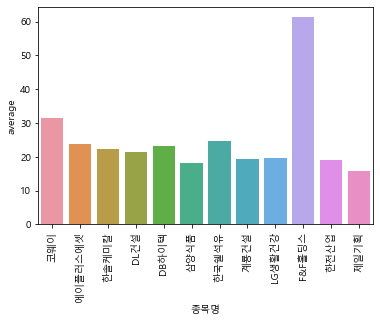

In [30]:
sns.barplot(
    data = df_ROE_14_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()

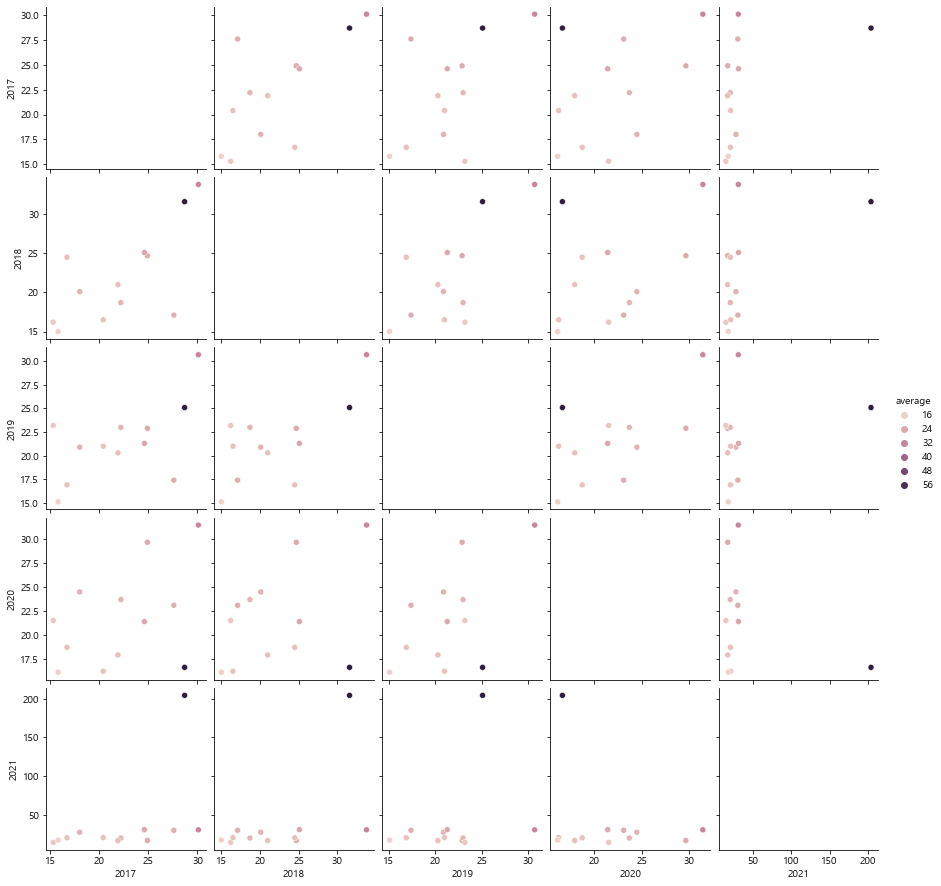

In [31]:
sns.pairplot(df_ROE_14_upper, hue="average")

In [32]:
# ROE 15이상
df_ROE_15_upper = df[(df[2017] >= 15) & (df[2018] >= 15) & (df[2019] >= 15) & (df[2020] >= 15) & (df[2021] >= 15)]
df_ROE_15_upper

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0
28,DB하이텍,27.6,17.1,17.4,23.1,30.0
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8
52,계룡건설,16.7,24.5,16.9,18.7,20.3
62,LG생활건강,21.9,21.0,20.3,17.9,16.7
63,F&F홀딩스,28.7,31.6,25.1,16.6,204.3
66,한전산업,20.4,16.5,21.0,16.2,20.6


In [33]:
# '평균' 열 추가
df_ROE_15_upper["average"] = df_ROE_15_upper.mean(axis=1)
df_ROE_15_upper

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52
28,DB하이텍,27.6,17.1,17.4,23.1,30.0,23.04
32,한국쉘석유,24.6,25.1,21.3,21.4,30.8,24.64
52,계룡건설,16.7,24.5,16.9,18.7,20.3,19.42
62,LG생활건강,21.9,21.0,20.3,17.9,16.7,19.56
63,F&F홀딩스,28.7,31.6,25.1,16.6,204.3,61.26
66,한전산업,20.4,16.5,21.0,16.2,20.6,18.94


In [34]:
df_ROE_15_upper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 11 to 67
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      11 non-null     object 
 1   2017     11 non-null     float64
 2   2018     11 non-null     float64
 3   2019     11 non-null     float64
 4   2020     11 non-null     float64
 5   2021     11 non-null     float64
 6   average  11 non-null     float64
dtypes: float64(6), object(1)
memory usage: 704.0+ bytes


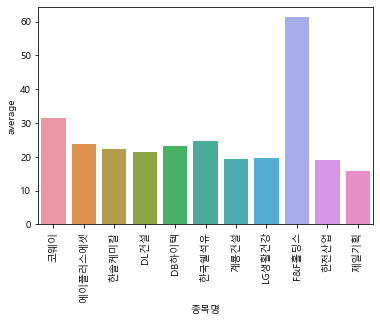

In [35]:
sns.barplot(
    data = df_ROE_15_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()

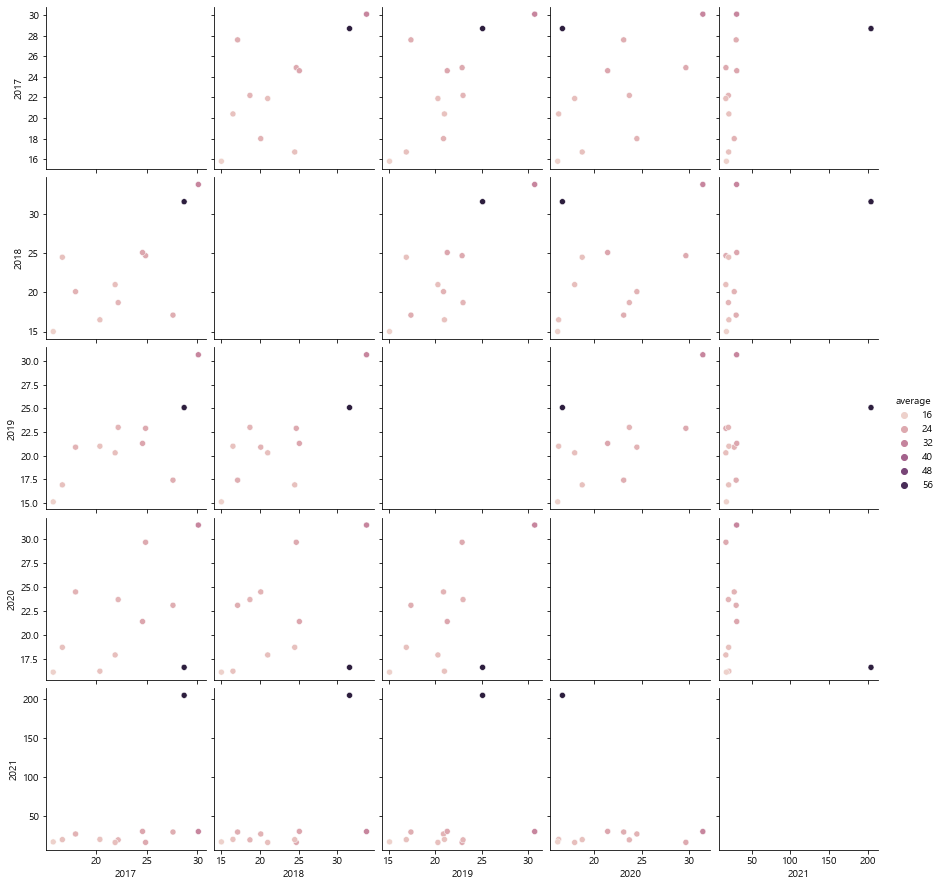

In [36]:
sns.pairplot(df_ROE_15_upper, hue="average")